# 📘 **Guía para la Visualización de Resultados en Regresión Logística con Python, Scikit-learn, Matplotlib y Seaborn**

---

### **Aplicaciones en Machine Learning y Educación en Ingeniería de Datos**

---

<div align="center">

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg" alt="Python Logo" width="120"/>
&nbsp;&nbsp;&nbsp;&nbsp;
<img src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" alt="Scikit-learn Logo" width="120"/>
&nbsp;&nbsp;&nbsp;&nbsp;
<img src="https://matplotlib.org/_static/images/logo2.svg" alt="Matplotlib Logo" width="120"/>
<img src="https://seaborn.pydata.org/_static/logo-wide-lightbg.svg" alt="Seaborn Logo" width="200"/>

</div>

---

### 👨‍🏫 **Autores:**  
**Carlos Andrés Tamayo Benjumea**  
Ingeniero de Sistemas | Docente Universitario  
**José Javier Coronel Casadiego**  
Ingeniero de Sistemas | Especialista en Docencia Universitaria | Docente Universitario  

---

### 🛠️ **Herramientas Utilizadas:**  
- Python  
- Google Colab  
- Scikit-learn  
- Matplotlib  
- Seaborn  

---

### 🎯 **Propósito:**  
Desarrollar y visualizar modelos de **Regresión Logística** para clasificación supervisada mediante herramientas de Python, aplicando buenas prácticas didácticas para su uso en ingeniería, análisis de datos y educación en machine learning.

---

### 📅 **Fecha:**  
22 de Julio de 2025  

---


# 📒 Clasificación con Regresión Logística en Machine Learning  
## Guía paso a paso con Python, Scikit-learn, Classification Report y Matriz de Confusión  

🎯 **Objetivo:**  
Desarrollar un ejemplo completo y didáctico para entrenar, evaluar e interpretar un modelo de **Regresión Logística** aplicado a tareas de **clasificación supervisada** utilizando `Scikit-learn`.  

El proceso incluirá:
- Preparación y exploración del conjunto de datos.
- Preprocesamiento necesario para datos de texto (en caso de ser necesario).
- Entrenamiento del modelo.
- Evaluación mediante métricas como **Accuracy**, **Precision**, **Recall** y **F1-Score** mediante el **Classification Report**.
- Interpretación de resultados a través de la **Matriz de Confusión**.

Esta guía tiene fines educativos y busca fortalecer la comprensión del funcionamiento de la regresión logística como modelo de clasificación binaria y su aplicación en problemas prácticos como la detección de spam.


## 📍 Introducción a la Regresión Logística

La **Regresión Logística** es un modelo supervisado ampliamente utilizado para problemas de **clasificación binaria**.  
Predice la probabilidad de pertenencia a una clase mediante la **función logística (sigmoide)**, transformando los resultados a un rango entre 0 y 1.

### **Características Principales:**
- Modelo interpretable y rápido de entrenar.
- Útil cuando las clases son aproximadamente linealmente separables.
- Proporciona probabilidades asociadas a las clases.
- Permite ajustar el umbral de decisión para priorizar Recall o Precision según el problema.


### **Representación Gráfica de la Regresión Logística**

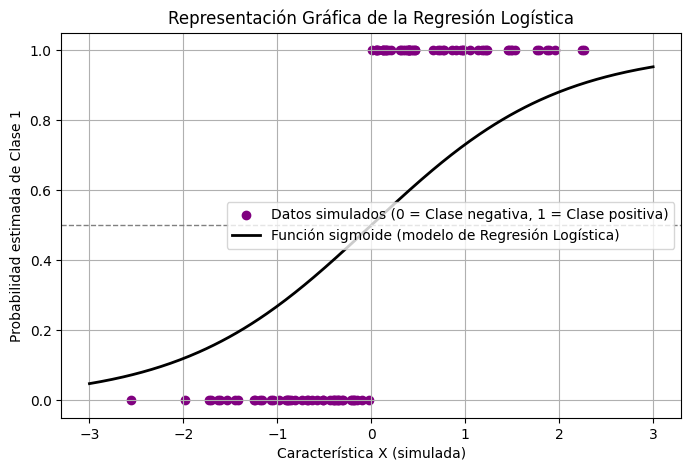

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Datos simulados para representar clasificación binaria con Regresión Logística
np.random.seed(0)
X = np.random.randn(100)
y = (X > 0).astype(int)

# Línea sigmoide para representar Regresión Logística
x_values = np.linspace(-3, 3, 300)
sigmoid = 1 / (1 + np.exp(-x_values))

# Crear gráfico
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='purple', label='Datos simulados (0 = Clase negativa, 1 = Clase positiva)')
plt.plot(x_values, sigmoid, color='black', linewidth=2, label='Función sigmoide (modelo de Regresión Logística)')
plt.axhline(0.5, color='grey', linestyle='--', linewidth=1)
plt.title("Representación Gráfica de la Regresión Logística")
plt.xlabel("Característica X (simulada)")
plt.ylabel("Probabilidad estimada de Clase 1")
plt.legend()
plt.grid(True)
plt.show()


# 📘 Regresión Logística para Detección de Spam (SMS) con Python y Scikit-learn

## Aplicaciones en Machine Learning y Educación en Ingeniería de Datos

Este notebook presenta una implementación didáctica de **Regresión Logística** aplicada a la detección de **mensajes de texto (SMS) spam** mediante técnicas de procesamiento de texto y clasificación binaria.  
Incluye buenas prácticas de preprocesamiento, entrenamiento, evaluación e interpretación de resultados.


## 🔧 Librerías y Herramientas Utilizadas

- `pandas`: manipulación de datos tabulares
- `matplotlib`, `seaborn`: visualización gráfica
- `sklearn`: Machine Learning (Regresión Logística, métricas, preprocesamiento)
- `CountVectorizer`: conversión de texto a vectores numéricos

Estas librerías son esenciales para proyectos de clasificación binaria con datos de texto.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Descargar dataset desde URL
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_table(url, header=None, names=['label', 'message'])

df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df["label"].value_counts()


,count
label,
ham,4825
spam,747


🔍 Este conjunto de datos contiene mensajes etiquetados como:
- **ham**: Mensajes legítimos.
- **spam**: Mensajes no deseados.

El objetivo es construir un modelo que pueda identificar si un mensaje es spam o no.


/tmp/ipython-input-4-1605810598.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", palette="Set2")


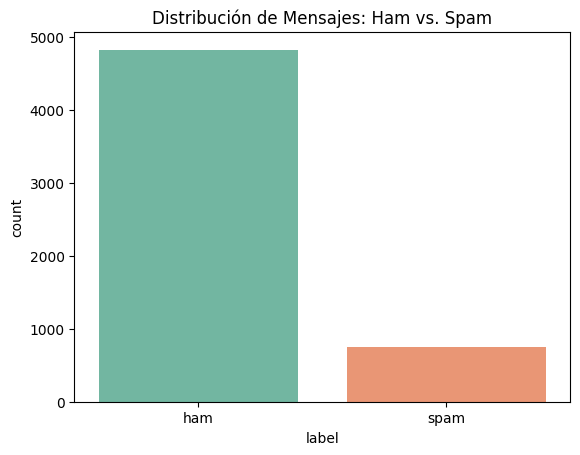

In [4]:
sns.countplot(data=df, x="label", palette="Set2")
plt.title("Distribución de Mensajes: Ham vs. Spam")
plt.show()


In [5]:
df["label_num"] = df["label"].map({"ham": 0, "spam": 1})


🔢 Conversión de etiquetas a variables numéricas

Hemos transformado las etiquetas **"ham"** y **"spam"** en valores numéricos para que puedan ser interpretados correctamente por el modelo de clasificación.

La codificación utilizada es la siguiente:
- **0**: Mensaje legítimo (**ham**)
- **1**: Mensaje no deseado (**spam**)

Esta transformación es un paso fundamental en cualquier tarea de Machine Learning supervisado, ya que los algoritmos requieren variables numéricas para realizar cálculos.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    df["message"], df["label_num"], test_size=0.3, random_state=42, stratify=df["label_num"]
)

print(f"🔹 Entrenamiento: {X_train.shape}")
print(f"🔹 Prueba: {X_test.shape}")


🔹 Entrenamiento: (3900,)
🔹 Prueba: (1672,)


📑 División de los datos

El conjunto ha sido dividido en:
- **70% entrenamiento**
- **30% prueba**

Se utilizó estratificación para mantener la proporción original de clases.


In [7]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


🔢 El texto ha sido convertido a una matriz numérica utilizando **CountVectorizer**, técnica que convierte las palabras a frecuencias de ocurrencia en los mensajes.


In [8]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_vec, y_train)


LogisticRegression(max_iter=1000, random_state=42)

🎯 Entrenamos un modelo de **Regresión Logística** para resolver este problema de clasificación binaria.  
Este modelo asigna probabilidades a cada clase y toma decisiones basadas en un umbral (por defecto 0.5).


In [9]:
y_pred = log_model.predict(X_test_vec)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔢 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.9784688995215312

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       0.99      0.85      0.91       224

    accuracy                           0.98      1672
   macro avg       0.98      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672


🔢 Confusion Matrix:
 [[1446    2]
 [  34  190]]


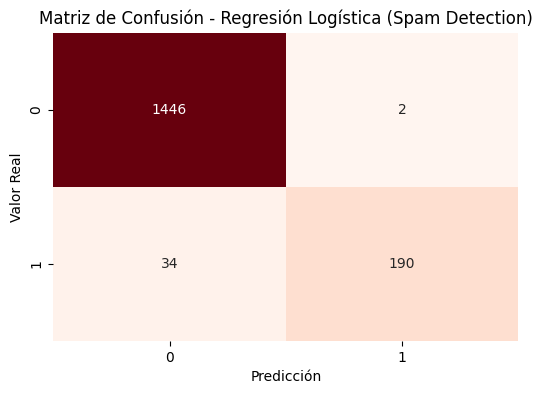

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - Regresión Logística (Spam Detection)")
plt.show()


### 🎨 Visualización de la Matriz de Confusión

La **Matriz de Confusión** es una herramienta fundamental para evaluar el desempeño de modelos de clasificación binaria como la Regresión Logística.

En esta representación:
- Las celdas de la **diagonal principal** corresponden a las predicciones correctas (ham como ham, spam como spam).
- Las celdas **fuera de la diagonal** representan errores de clasificación.

La visualización mediante `seaborn.heatmap` facilita la interpretación rápida de los aciertos y errores, reforzando el análisis más allá de las métr


## 📝 Conclusiones

✔️ El modelo de **Regresión Logística** ha demostrado ser una solución sencilla y efectiva para problemas de clasificación binaria como la detección de spam.  
✔️ Su simplicidad y capacidad de producir probabilidades lo hacen adecuado para interpretar los resultados y ajustar la toma de decisiones en función del contexto.  
✔️ Este caso evidencia la importancia del preprocesamiento adecuado de texto para convertir datos no estructurados en representaciones numéricas comprensibles por modelos estadísticos.

---
